In [1]:
import pandas as pd
import xgboost as xgb
import torch
import torchvision
import torchvision.transforms as transforms


/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
path = '/Users/zeeshan_ahmedd/Downloads/controversy_data_release/posts_from_paper/'

In [3]:
df_askmen = pd.read_json(path+'AskMen_posts_from_paper.jsonlist', lines = True)

In [4]:
df_askwomen = pd.read_json(path+'AskWomen_posts_from_paper.jsonlist',lines =True)


In [5]:
df_fitness = pd.read_json(path+'AskWomen_posts_from_paper.jsonlist', lines=True)

In [6]:
df_lifeprotips = pd.read_json(path+'LifeProTips_posts_from_paper.jsonlist', lines = True)

In [7]:
df_personalfinance = pd.read_json(path+'personalfinance_posts_from_paper.jsonlist', lines = True)

In [8]:
df_relationships = pd.read_json(path+'relationships_posts_from_paper.jsonlist', lines = True)

In [9]:
df_list = [df_askmen,df_askwomen,df_fitness,df_lifeprotips,df_personalfinance,df_personalfinance,df_relationships]

In [10]:
df = pd.concat(df_list,ignore_index=True)

In [11]:
df

,domain,banned_by,media_embed,subreddit,selftext_html,selftext,likes,secure_media,link_flair_text,id,...,gilded,archived,from,retrieved_on,hide_score,from_id,quarantine,user_reports,report_reasons,mod_reports
0,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...","I'm interested in saying something like ""You'r...",NaN,NaN,None,t3_1xvn2n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...","As a girl, I don't understand how guys can lif...",NaN,NaN,None,t3_1xvkxf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",My parents take a very good interest in my lif...,NaN,NaN,None,t3_1xvhpu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",It's been made apparent to me that my face in ...,NaN,NaN,None,t3_1xuzg3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...","Or major you're studying for, if you're in sch...",NaN,NaN,None,t3_1xuz26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,self.relationships,NaN,{},relationships,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...","My bf and I, both in our early 20's, have been...",NaN,NaN,None,t3_mv4ry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15068,self.relationships,NaN,{},relationships,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",Me 30(M) and girlfriend is 26. \nShould I be u...,NaN,NaN,None,t3_murh2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15069,self.relationships,NaN,{},relationships,NaN,"*Go easy on me, guys, first time on this sub, ...",NaN,NaN,Dating,t3_1w6nwz,...,0.0,1.0,NaN,1.441943e+09,0.0,NaN,0.0,NaN,NaN,NaN
15070,self.relationships,NaN,{},relationships,NaN,Well I'll make this short and to the point. \n...,NaN,NaN,[new],t3_1wodbm,...,0.0,1.0,NaN,1.441935e+09,0.0,NaN,0.0,NaN,NaN,NaN


In [12]:
df['hide_score'].isna().sum()

15050

In [13]:
df['likes'].isna().sum()

15072

In [14]:
df['secure_media'].isna().sum()

15072

In [15]:
df['approved_by'].isna().sum()

15072

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   domain                  15072 non-null  object 
 1   banned_by               0 non-null      float64
 2   media_embed             15072 non-null  object 
 3   subreddit               15072 non-null  object 
 4   selftext_html           13192 non-null  object 
 5   selftext                15072 non-null  object 
 6   likes                   0 non-null      float64
 7   secure_media            0 non-null      float64
 8   link_flair_text         1801 non-null   object 
 9   id                      15072 non-null  object 
 10  secure_media_embed      5891 non-null   object 
 11  clicked                 15049 non-null  float64
 12  stickied                5891 non-null   float64
 13  title                   15072 non-null  object 
 14  media                   0 non-null    

In [17]:
df.drop(['likes','from','secure_media','from_id','report_reasons','from_kind','banned_by','user_reports','mod_reports','media_embed','selftext_html','media','approved_by','num_reports'], axis = 1)

,domain,subreddit,selftext,link_flair_text,id,secure_media_embed,clicked,stickied,title,base10id,...,ratios,scores,controversy_label,train_val_test,eventual_n_comments,gilded,archived,retrieved_on,hide_score,quarantine
0,self.AskMen,AskMen,"I'm interested in saying something like ""You'r...",None,t3_1xvn2n,{},0.0,0.0,My crush doesn't have a valentine..,117369743.0,...,"[0.68, 0.68, 0.7000000000000001, 0.68, 0.68, 0...","[14, 15, 16, 15, 14, 13, 14, 16, 14, 16]",1,"[1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1]",42,NaN,NaN,NaN,NaN,NaN
1,self.AskMen,AskMen,"As a girl, I don't understand how guys can lif...",None,t3_1xvkxf,{},0.0,0.0,How easily can guys lift girls?,117366963.0,...,"[0.71, 0.7000000000000001, 0.7000000000000001,...","[46, 42, 43, 46, 40, 42, 46, 39, 43, 42]",1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1]",163,NaN,NaN,NaN,NaN,NaN
2,self.AskMen,AskMen,My parents take a very good interest in my lif...,None,t3_1xvhpu,{},0.0,0.0,Do you think lying to your parents about how w...,117362802.0,...,"[0.6900000000000001, 0.68, 0.67, 0.65, 0.66, 0...","[10, 10, 9, 8, 8, 10, 8, 10, 10, 8]",1,"[0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]",34,NaN,NaN,NaN,NaN,NaN
3,self.AskMen,AskMen,It's been made apparent to me that my face in ...,None,t3_1xuzg3,{},0.0,0.0,"Women have makeup, but is there any way for a ...",117339123.0,...,"[0.86, 0.87, 0.87, 0.87, 0.86, 0.87, 0.87, 0.8...","[73, 77, 77, 74, 73, 75, 73, 71, 72, 74]",0,"[0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0]",137,NaN,NaN,NaN,NaN,NaN
4,self.AskMen,AskMen,"Or major you're studying for, if you're in sch...",None,t3_1xuz26,{},0.0,0.0,What do you and your SO each do for a living? ...,117338622.0,...,"[0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.8...","[212, 218, 217, 216, 217, 216, 216, 217, 213, ...",0,"[0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0]",390,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,self.relationships,relationships,"My bf and I, both in our early 20's, have been...",None,t3_mv4ry,NaN,0.0,NaN,Can you ever TRULY get over someone cheating o...,NaN,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[10, 10, 10, 10, 10, 10, 11, 10, 10, 10]",0,"[0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0]",31,NaN,NaN,NaN,NaN,NaN
15068,self.relationships,relationships,Me 30(M) and girlfriend is 26. \nShould I be u...,None,t3_murh2,NaN,0.0,NaN,girlfriend hacked into facebook account..........,NaN,...,"[0.76, 0.77, 0.75, 0.76, 0.76, 0.76, 0.76, 0.7...","[49, 51, 46, 50, 49, 50, 49, 51, 49, 45]",1,"[0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2]",197,NaN,NaN,NaN,NaN,NaN
15069,self.relationships,relationships,"*Go easy on me, guys, first time on this sub, ...",Dating,t3_1w6nwz,{},NaN,0.0,Me [22M] Did I do the right thing? And advice ...,NaN,...,"[0.72, 0.73, 0.73, 0.72, 0.72, 0.75, 0.72, 0.7...","[17, 18, 18, 17, 18, 20, 17, 16, 17, 18]",1,"[0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2]",32,0.0,1.0,1.441943e+09,0.0,0.0
15070,self.relationships,relationships,Well I'll make this short and to the point. \n...,[new],t3_1wodbm,{},NaN,0.0,So my (f23) husband (m30) is lying to me about...,NaN,...,"[0.5700000000000001, 0.5700000000000001, 0.570...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1,"[0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0]",34,0.0,1.0,1.441935e+09,0.0,0.0


In [18]:
df['controversy_label'].value_counts()

0    7538
1    7534
Name: controversy_label, dtype: int64

In [19]:
df['selftext']

0        I'm interested in saying something like "You'r...
1        As a girl, I don't understand how guys can lif...
2        My parents take a very good interest in my lif...
3        It's been made apparent to me that my face in ...
4        Or major you're studying for, if you're in sch...
                               ...                        
15067    My bf and I, both in our early 20's, have been...
15068    Me 30(M) and girlfriend is 26. \nShould I be u...
15069    *Go easy on me, guys, first time on this sub, ...
15070    Well I'll make this short and to the point. \n...
15071    My parents own some rental properties and they...
Name: selftext, Length: 15072, dtype: object

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()


In [21]:
df['sentiment'] = df['selftext'].apply(lambda x: sid_obj.polarity_scores(x))

In [22]:
df['sentiment']

0        {'neg': 0.03, 'neu': 0.696, 'pos': 0.274, 'com...
1        {'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'comp...
2        {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'comp...
3        {'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'comp...
4        {'neg': 0.045, 'neu': 0.875, 'pos': 0.081, 'co...
                               ...                        
15067    {'neg': 0.194, 'neu': 0.684, 'pos': 0.122, 'co...
15068    {'neg': 0.066, 'neu': 0.843, 'pos': 0.091, 'co...
15069    {'neg': 0.092, 'neu': 0.802, 'pos': 0.106, 'co...
15070    {'neg': 0.098, 'neu': 0.837, 'pos': 0.065, 'co...
15071    {'neg': 0.051, 'neu': 0.822, 'pos': 0.127, 'co...
Name: sentiment, Length: 15072, dtype: object

In [23]:
sentiment = df['sentiment'].apply(pd.Series)

In [24]:
sentiment

,neg,neu,pos,compound
0,0.030,0.696,0.274,0.9417
1,0.000,0.952,0.048,0.5927
2,0.000,0.684,0.316,0.9514
3,0.127,0.873,0.000,-0.4404
4,0.045,0.875,0.081,0.6001
...,...,...,...,...
15067,0.194,0.684,0.122,-0.9903
15068,0.066,0.843,0.091,0.5365
15069,0.092,0.802,0.106,0.9591
15070,0.098,0.837,0.065,-0.9722


In [25]:
result = pd.concat([df, sentiment], axis=1, join='inner')

In [26]:
result_new = result.drop(['sentiment'], axis =1)

In [27]:
result_new

,domain,banned_by,media_embed,subreddit,selftext_html,selftext,likes,secure_media,link_flair_text,id,...,hide_score,from_id,quarantine,user_reports,report_reasons,mod_reports,neg,neu,pos,compound
0,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...","I'm interested in saying something like ""You'r...",NaN,NaN,None,t3_1xvn2n,...,NaN,NaN,NaN,NaN,NaN,NaN,0.030,0.696,0.274,0.9417
1,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...","As a girl, I don't understand how guys can lif...",NaN,NaN,None,t3_1xvkxf,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.952,0.048,0.5927
2,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",My parents take a very good interest in my lif...,NaN,NaN,None,t3_1xvhpu,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.684,0.316,0.9514
3,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",It's been made apparent to me that my face in ...,NaN,NaN,None,t3_1xuzg3,...,NaN,NaN,NaN,NaN,NaN,NaN,0.127,0.873,0.000,-0.4404
4,self.AskMen,NaN,{},AskMen,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...","Or major you're studying for, if you're in sch...",NaN,NaN,None,t3_1xuz26,...,NaN,NaN,NaN,NaN,NaN,NaN,0.045,0.875,0.081,0.6001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,self.relationships,NaN,{},relationships,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...","My bf and I, both in our early 20's, have been...",NaN,NaN,None,t3_mv4ry,...,NaN,NaN,NaN,NaN,NaN,NaN,0.194,0.684,0.122,-0.9903
15068,self.relationships,NaN,{},relationships,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",Me 30(M) and girlfriend is 26. \nShould I be u...,NaN,NaN,None,t3_murh2,...,NaN,NaN,NaN,NaN,NaN,NaN,0.066,0.843,0.091,0.5365
15069,self.relationships,NaN,{},relationships,NaN,"*Go easy on me, guys, first time on this sub, ...",NaN,NaN,Dating,t3_1w6nwz,...,0.0,NaN,0.0,NaN,NaN,NaN,0.092,0.802,0.106,0.9591
15070,self.relationships,NaN,{},relationships,NaN,Well I'll make this short and to the point. \n...,NaN,NaN,[new],t3_1wodbm,...,0.0,NaN,0.0,NaN,NaN,NaN,0.098,0.837,0.065,-0.9722


In [28]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   domain                  15072 non-null  object 
 1   banned_by               0 non-null      float64
 2   media_embed             15072 non-null  object 
 3   subreddit               15072 non-null  object 
 4   selftext_html           13192 non-null  object 
 5   selftext                15072 non-null  object 
 6   likes                   0 non-null      float64
 7   secure_media            0 non-null      float64
 8   link_flair_text         1801 non-null   object 
 9   id                      15072 non-null  object 
 10  secure_media_embed      5891 non-null   object 
 11  clicked                 15049 non-null  float64
 12  stickied                5891 non-null   float64
 13  title                   15072 non-null  object 
 14  media                   0 non-null    

In [29]:
drop_coulmns = ['sentiment','mod_reports','report_reasons','user_reports','quarantine','from_id','hide_score','retrieved_on','from','archived','gilded','from_kind','num_reports','visited','distinguished','approved_by','media','secure_media','likes','banned_by','media_embed','secure_media_embed','clicked','stickied','train_val_test','children','domain','id','edited','selftext_html','name','scores','subreddit_id','base10id','hidden','thumbnail','is_self','saved','permalink','ratios','created','created_utc','author','link_flair_css_class','author_flair_text','url','score','eventual_n_comments','title']

In [30]:
result_new1 = result.drop(drop_coulmns,axis=1)

In [31]:
result_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subreddit               15072 non-null  object 
 1   selftext                15072 non-null  object 
 2   link_flair_text         1801 non-null   object 
 3   over_18                 15072 non-null  bool   
 4   author_flair_css_class  3079 non-null   object 
 5   downs                   15072 non-null  int64  
 6   num_comments            15072 non-null  int64  
 7   ups                     15072 non-null  int64  
 8   controversy_label       15072 non-null  int64  
 9   neg                     15072 non-null  float64
 10  neu                     15072 non-null  float64
 11  pos                     15072 non-null  float64
 12  compound                15072 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 1.4+ MB


In [32]:
result_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subreddit               15072 non-null  object 
 1   selftext                15072 non-null  object 
 2   link_flair_text         1801 non-null   object 
 3   over_18                 15072 non-null  bool   
 4   author_flair_css_class  3079 non-null   object 
 5   downs                   15072 non-null  int64  
 6   num_comments            15072 non-null  int64  
 7   ups                     15072 non-null  int64  
 8   controversy_label       15072 non-null  int64  
 9   neg                     15072 non-null  float64
 10  neu                     15072 non-null  float64
 11  pos                     15072 non-null  float64
 12  compound                15072 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 1.4+ MB


In [33]:
import seaborn as sn
import matplotlib.pyplot as plt


/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
corrMatrix = result_new1.corr()

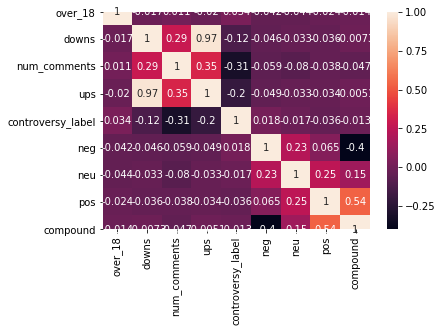

In [35]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [36]:
result_new1

,subreddit,selftext,link_flair_text,over_18,author_flair_css_class,downs,num_comments,ups,controversy_label,neg,neu,pos,compound
0,AskMen,"I'm interested in saying something like ""You'r...",None,False,female,0,18,1,1,0.030,0.696,0.274,0.9417
1,AskMen,"As a girl, I don't understand how guys can lif...",None,False,None,0,85,1,1,0.000,0.952,0.048,0.5927
2,AskMen,My parents take a very good interest in my lif...,None,False,male,0,27,1,1,0.000,0.684,0.316,0.9514
3,AskMen,It's been made apparent to me that my face in ...,None,False,male,0,96,1,0,0.127,0.873,0.000,-0.4404
4,AskMen,"Or major you're studying for, if you're in sch...",None,False,None,0,267,1,0,0.045,0.875,0.081,0.6001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,relationships,"My bf and I, both in our early 20's, have been...",None,False,NaN,0,31,10,0,0.194,0.684,0.122,-0.9903
15068,relationships,Me 30(M) and girlfriend is 26. \nShould I be u...,None,False,NaN,27,172,75,1,0.066,0.843,0.091,0.5365
15069,relationships,"*Go easy on me, guys, first time on this sub, ...",Dating,False,NaN,0,28,17,1,0.092,0.802,0.106,0.9591
15070,relationships,Well I'll make this short and to the point. \n...,[new],False,NaN,0,28,1,1,0.098,0.837,0.065,-0.9722


In [37]:
result_new1.columns

Index(['subreddit', 'selftext', 'link_flair_text', 'over_18',
       'author_flair_css_class', 'downs', 'num_comments', 'ups',
       'controversy_label', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [38]:
result_new2 = result_new1.rename(columns={"subreddit": "df_subreddit", "downs": "df_downs","ups":"df_ups","neg":"df_neg","neu":"df_neu","pos":"df_pos","compound":"df_compound"})

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(result_new1['selftext'])

In [40]:
print(X)

  (0, 14667)	0.052758833296826395
  (0, 8840)	0.06668087610762861
  (0, 13325)	0.07532089531458908
  (0, 23274)	0.09949944536951114
  (0, 28235)	0.06687047782560766
  (0, 24025)	0.2605203541326024
  (0, 15930)	0.10482187589437102
  (0, 13035)	0.24077074036873053
  (0, 9163)	0.24987524966801578
  (0, 3945)	0.08453756743800904
  (0, 12788)	0.18136267924018232
  (0, 15190)	0.07800823104324014
  (0, 4940)	0.2244471923708421
  (0, 24000)	0.2193037980810616
  (0, 18527)	0.07437391934817573
  (0, 12637)	0.16597887275502174
  (0, 13018)	0.09778738233660843
  (0, 14556)	0.24501860462146852
  (0, 18435)	0.06549644555356933
  (0, 9496)	0.13604700440807793
  (0, 12497)	0.1011879651612436
  (0, 22525)	0.3182431904322039
  (0, 28180)	0.15042940766254204
  (0, 25756)	0.11196981097510435
  (0, 10702)	0.08956154058378597
  :	:
  (15071, 28523)	0.048491593285220264
  (15071, 5283)	0.029755972860368025
  (15071, 3205)	0.029414101658112115
  (15071, 14667)	0.06207849934273647
  (15071, 8840)	0.02615327434

In [41]:
tf_idf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
type(tf_idf)

pandas.core.frame.DataFrame

In [42]:
tf_idf

,00,000,00002,000ish,000k,000usd,00412bl,007b,008,00am,...,zorua,zphoto,zqoqa,zulu,zuri,zv9dc,zzi9gvh,zzz,zzzc,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
result_new2['num_comments']

0         18
1         85
2         27
3         96
4        267
        ... 
15067     31
15068    172
15069     28
15070     28
15071    193
Name: num_comments, Length: 15072, dtype: int64

In [44]:
res = pd.concat([result_new2, tf_idf], axis=1)


In [45]:
res

,df_subreddit,selftext,link_flair_text,over_18,author_flair_css_class,df_downs,num_comments,df_ups,controversy_label,df_neg,...,zorua,zphoto,zqoqa,zulu,zuri,zv9dc,zzi9gvh,zzz,zzzc,zzzz
0,AskMen,"I'm interested in saying something like ""You'r...",None,False,female,0,18,1,1,0.030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AskMen,"As a girl, I don't understand how guys can lif...",None,False,None,0,85,1,1,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AskMen,My parents take a very good interest in my lif...,None,False,male,0,27,1,1,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AskMen,It's been made apparent to me that my face in ...,None,False,male,0,96,1,0,0.127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AskMen,"Or major you're studying for, if you're in sch...",None,False,None,0,267,1,0,0.045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,relationships,"My bf and I, both in our early 20's, have been...",None,False,NaN,0,31,10,0,0.194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15068,relationships,Me 30(M) and girlfriend is 26. \nShould I be u...,None,False,NaN,27,172,75,1,0.066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15069,relationships,"*Go easy on me, guys, first time on this sub, ...",Dating,False,NaN,0,28,17,1,0.092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15070,relationships,Well I'll make this short and to the point. \n...,[new],False,NaN,0,28,1,1,0.098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
res_new = res.drop(['selftext','link_flair_text','author_flair_css_class'], axis=1)

In [47]:
res_new['ups']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15067    0.0
15068    0.0
15069    0.0
15070    0.0
15071    0.0
Name: ups, Length: 15072, dtype: float64

In [48]:
res_new['df_subreddit']

0               AskMen
1               AskMen
2               AskMen
3               AskMen
4               AskMen
             ...      
15067    relationships
15068    relationships
15069    relationships
15070    relationships
15071    relationships
Name: df_subreddit, Length: 15072, dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder


In [50]:
le = LabelEncoder()

In [51]:
res_new['over_18'] = le.fit_transform(res_new['over_18'])

In [52]:
res_new['subreddit']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15067    0.0
15068    0.0
15069    0.0
15070    0.0
15071    0.0
Name: subreddit, Length: 15072, dtype: float64

In [53]:
res_new['df_subreddit'] = le.fit_transform(res_new['df_subreddit'])

In [54]:
res_new['df_subreddit'].value_counts()

1    5938
0    3305
4    2248
3    2008
2    1573
Name: df_subreddit, dtype: int64

In [55]:
res_new['over_18'].value_counts()


0    14309
1      763
Name: over_18, dtype: int64

In [56]:
X = res_new.drop('controversy_label', axis=1)

In [57]:
X

,df_subreddit,over_18,df_downs,num_comments,df_ups,df_neg,df_neu,df_pos,df_compound,00,...,zorua,zphoto,zqoqa,zulu,zuri,zv9dc,zzi9gvh,zzz,zzzc,zzzz
0,0,0,0,18,1,0.030,0.696,0.274,0.9417,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,85,1,0.000,0.952,0.048,0.5927,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,27,1,0.000,0.684,0.316,0.9514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,96,1,0.127,0.873,0.000,-0.4404,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,267,1,0.045,0.875,0.081,0.6001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,4,0,0,31,10,0.194,0.684,0.122,-0.9903,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15068,4,0,27,172,75,0.066,0.843,0.091,0.5365,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15069,4,0,0,28,17,0.092,0.802,0.106,0.9591,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15070,4,0,0,28,1,0.098,0.837,0.065,-0.9722,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
y = res_new['controversy_label']
y

0        1
1        1
2        1
3        0
4        0
        ..
15067    0
15068    1
15069    1
15070    1
15071    0
Name: controversy_label, Length: 15072, dtype: int64

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Stochastic Gradient Classifier with hinge loss

In [61]:
from sklearn.linear_model import SGDClassifier


In [62]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter = 5)
clf.fit(X_train, y_train)


/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [66]:
accuracy = accuracy_score(y_test, y_pred)

In [67]:
accuracy

0.5607749469214437

In [68]:
dict_acc = {}
list_max_iter = [1,2,5,10]
for i in list_max_iter:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    dict_acc.update({i:accuracy})
dict_acc

/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

{1: 0.578556263269639,
 2: 0.5172505307855626,
 5: 0.5143312101910829,
 10: 0.6507430997876857}

In [69]:
acc_df = pd.DataFrame.from_dict(dict_acc, orient='index')

In [70]:
import matplotlib.pyplot as plt


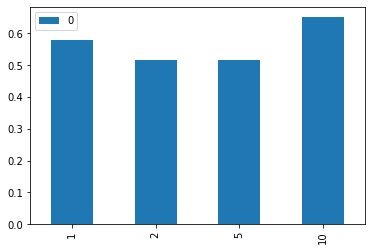

In [71]:
acc_df.plot(kind = 'bar')

In [72]:
max_iter ={'1':accuracy}

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72      1859
           1       0.84      0.38      0.53      1909

    accuracy                           0.65      3768
   macro avg       0.72      0.65      0.63      3768
weighted avg       0.72      0.65      0.62      3768



# SVM Classifier

In [74]:
from sklearn.svm import SVC  

In [75]:
clf = SVC(kernel='rbf') 

In [76]:
clf.fit(X_train, y_train) 

/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [77]:
y_pred =clf.predict(X_test)

In [78]:
svm_accuracy = accuracy_score(y_test, y_pred)

In [79]:
svm_accuracy

0.9761146496815286

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1859
           1       0.97      0.99      0.98      1909

    accuracy                           0.98      3768
   macro avg       0.98      0.98      0.98      3768
weighted avg       0.98      0.98      0.98      3768



# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
max_depth_list = [20,40,60,80,90,100]

In [83]:
max_depth_dict = {}

In [84]:
for i in max_depth_list:
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    max_depth_dict.update({i:accuracy})
max_depth_dict

/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/zeeshan_ahmedd/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/z

{20: 0.6571125265392781,
 40: 0.7295647558386412,
 60: 0.767515923566879,
 80: 0.7884819532908705,
 90: 0.7985668789808917,
 100: 0.7993630573248408}

In [85]:
rf_df = pd.DataFrame.from_dict(max_depth_dict, orient='index')

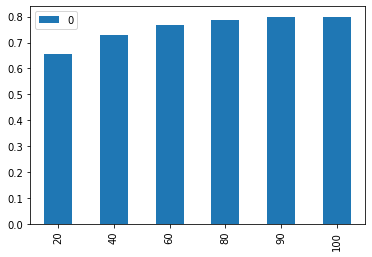

In [86]:
rf_df.plot(kind = 'bar')

# XGBOOST

In [88]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
   

y_pred = clf.predict(X_test)
   

In [89]:
accuracy_score(y_test,y_pred)

0.9745222929936306

In [91]:
import time
time.ctime()

'Mon Dec 13 09:05:38 2021'

# Pytorch

In [93]:
import torch

In [98]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Columns: 29057 entries, df_subreddit to zzzz
dtypes: float64(29052), int64(5)
memory usage: 3.3 GB


In [107]:
numerical_columns = list(X.columns)

In [108]:
numerical_data = np.stack([X[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)

In [109]:
numerical_data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [4., 0., 0.,  ..., 0., 0., 0.],
        [4., 0., 0.,  ..., 0., 0., 0.],
        [4., 0., 0.,  ..., 0., 0., 0.]])

In [237]:
y1 = y.astype('float')
y1.dtypes

dtype('float64')

In [ ]:
outputs = torch.tensor(y)

In [ ]:
outputs

In [ ]:
print(numerical_data.shape)

In [ ]:
print(outputs.shape)

In [ ]:
total_records = len(numerical_data)
test_records = int(total_records*.25)

In [ ]:
test_records

In [ ]:
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [274]:
train_outputs

tensor([1., 1., 1.,  ..., 0., 0., 1.], dtype=torch.float64)

In [275]:
train_outputs1 = train_outputs.unsqueeze(1)

In [285]:
test_outputs1 = test_outputs.unsqueeze(1)

In [276]:
print(len(numerical_train_data))
print(len(train_outputs))
print(len(numerical_test_data))
print(len(test_outputs))

11304
11304
3768
3768


In [277]:
class Model(nn.Module):

    def __init__(self, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        input_size =num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            all_layers.append(nn.Softmax())
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        all_layers.append(nn.Softmax())
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_numerical):
        x_numerical = self.batch_norm_num(x_numerical)
        
        x = self.layers(x_numerical)
        return x

In [278]:
model = Model(numerical_data.shape[1], 1, [200,100,50], p=0.4)

In [279]:
print(model)

Model(
  (batch_norm_num): BatchNorm1d(29057, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=29057, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Softmax(dim=None)
    (5): Linear(in_features=200, out_features=100, bias=True)
    (6): ReLU(inplace=True)
    (7): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Dropout(p=0.4, inplace=False)
    (9): Softmax(dim=None)
    (10): Linear(in_features=100, out_features=50, bias=True)
    (11): ReLU(inplace=True)
    (12): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Dropout(p=0.4, inplace=False)
    (14): Softmax(dim=None)
    (15): Linear(in_features=50, out_features=1, bias=True)
    (16): Softmax(dim=None)
  )
)


In [280]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [281]:
y_pred = model(numerical_train_data)

In [282]:
y_pred.shape

torch.Size([11304, 1])

In [288]:
epochs = 10
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs1)
    aggregated_losses.append(single_loss)

    if i%2 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()


epoch:   1 loss: 0.81113852
epoch:   3 loss: 0.81113852
epoch:   5 loss: 0.81113852
epoch:   7 loss: 0.81113852
epoch:   9 loss: 0.81113852


In [289]:
with torch.no_grad():
    y_val = model(numerical_test_data)
    loss = loss_function(y_val, test_outputs1)
print(f'Loss: {loss:.8f}')

Loss: 0.82016187


In [290]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[   0 1910]
 [   0 1858]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1910
         1.0       0.49      1.00      0.66      1858

    accuracy                           0.49      3768
   macro avg       0.25      0.50      0.33      3768
weighted avg       0.24      0.49      0.33      3768

0.49309978768577495
